In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../')
from package_global_functions import *
from evo_to_stationary import intEvo, simEvo
from time_study_maps import search_time

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

## F2 difference with last block

In [29]:
N, pi1, pi2, q1, q2, l = 5000, 0.1, 0.1, 9, 10, 0.3
# get the dataframes with the time evolutions:
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]

In [32]:
# testing for one dataframe
w = 10
t = 0.0005
for i in range(len(df)):
    block_avg = np.average(df['f2'].iloc[i:i+w])
    if abs(df['f2'].iloc[i+w+1] - block_avg) < t:
        print(f'Stationary at {i+w+1}')
        print(abs(df['f2'].iloc[i+w+1] - block_avg))
        break

Stationary at 121
0.000200000000000089


In [15]:
from scipy.ndimage import gaussian_filter1d

def search_time(w,t,evo,sig=0):
    """
    sig=0 -> no gaussian filter; sig != 0 -> apply gaussian filter with this sigma
    """
    if sig:
        evo_mod = gaussian_filter1d(evo, sig)
    else:
        evo_mod = evo
    time = float('nan')
    for i in range(len(evo_mod)-w):
        block_avg = np.average(evo_mod[i:i+w])
        if abs(evo_mod[i+w+1] - block_avg) < t:
            time = i+w+1
            break
    return time

### Stationary time from the raw time evolution

Average stationary time 161.16666666666666 +- 8.394773506308685


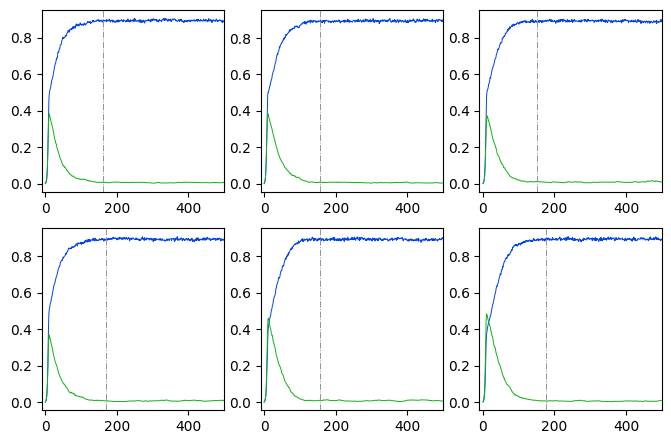

In [25]:
N, pi1, pi2, q1, q2, l = 5000, 0.26, 0.26, 7, 10, 0.99
# get the dataframes with the time evolutions:
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]

w = 50 # block size
t = 0.0005 # tolerance

fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
dfs2 = [[dfs[0], dfs[1], dfs[2]], [dfs[3], dfs[4], dfs[5]]]
times = []
for i in range(2):
    for j in range(3):
        # if i==1 and j==2:
        #     continue
        # else:
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue')
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f1'], lw=0.7, color='xkcd:green')
        ax[i,j].set(xlim=(-10,500))
        time = search_time(w, t, dfs2[i][j]['f2'])
        times.append(time)
        ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')
# fig.savefig(f'time_evo_with_stat_time_No_Gaussian_w_{w}_t_{t}_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.png')

### Stationary time filtering time evo; GF sigma = 50

Average stationary time 293.5 +- 23.74692962609412


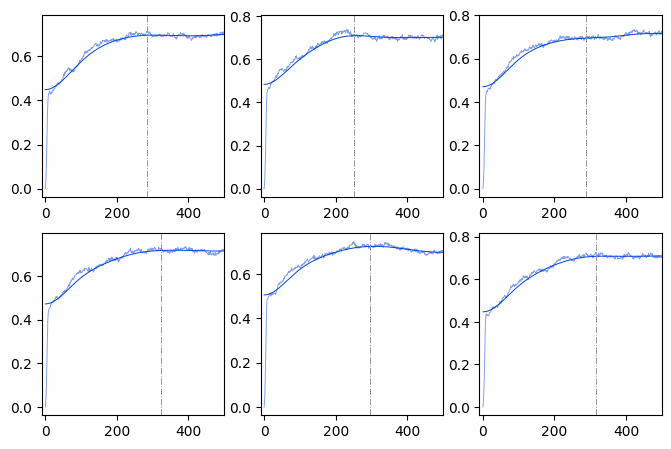

In [14]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 50

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        # if i==1 and j==2:
        #     continue
        # else:
        filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
        ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
        ax[i,j].set(xlim=(-10,500))
        time = search_time(w, t, filtered_f2)
        times.append(time)
        ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

### Stationary time filtering time evo; GF sigma = 20

Average stationary time 82.5 +- 4.752192476461084


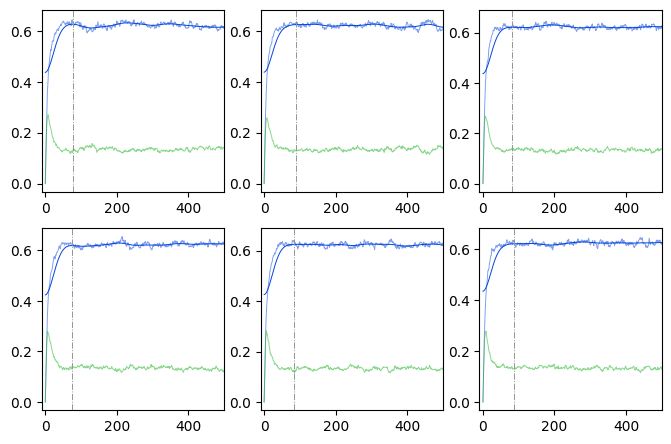

In [22]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 20

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        # if i==1 and j==2:
        #     continue
        # else:
        filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f1'], lw=0.7, color='xkcd:green', alpha=0.5)
        ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
        ax[i,j].set(xlim=(-10,500))
        time = search_time(w, t, filtered_f2)
        times.append(time)
        ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')
fig.savefig(f'time_evo_with_stat_time_Gaussian_sig_{sig}_w_{w}_t_{t}_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}.png')

### Stationary time filtering time evo; GF sigma = 10

Average stationary time 69.16666666666667 +- 22.244225218144948


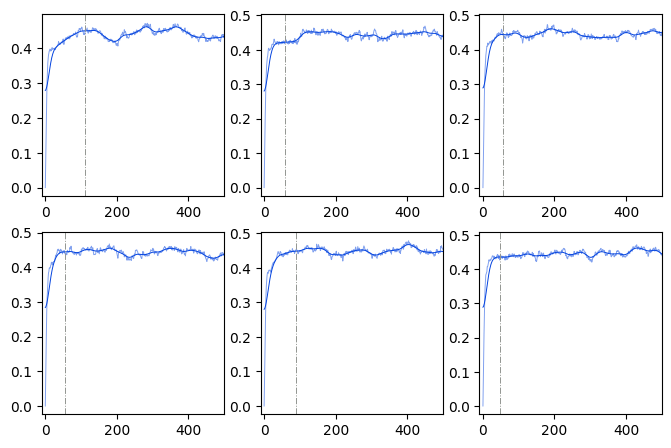

In [7]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 10

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        # if i==1 and j==2:
        #     continue
        # else:
        filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
        ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
        ax[i,j].set(xlim=(-10,500))
        time = search_time(w, t, filtered_f2)
        times.append(time)
        ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

### Stationary time filtering time evo; GF sigma = 5

Average stationary time 56.166666666666664 +- 21.91207176167714


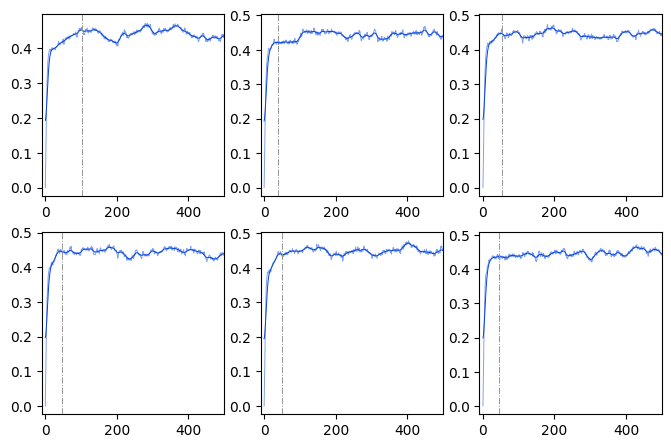

In [8]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 5

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        # if i==1 and j==2:
        #     continue
        # else:
        filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
        ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
        ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
        ax[i,j].set(xlim=(-10,500))
        time = search_time(w, t, filtered_f2)
        times.append(time)
        ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

### comparison of times, fix pis, qs; varying lambda
We will use a gaussian filter with sigma=20

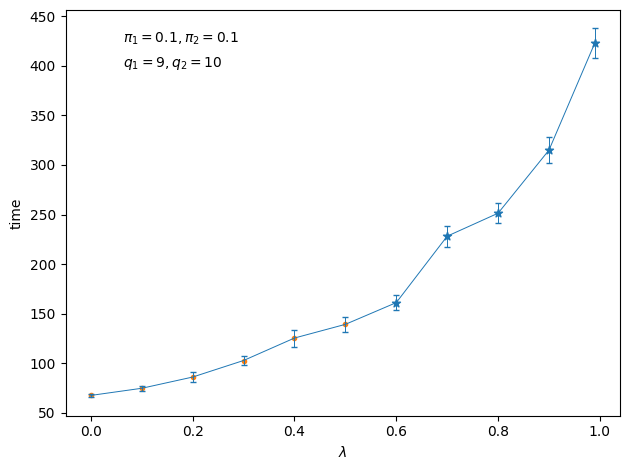

In [9]:
%matplotlib inline

lambs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
N, pi1, pi2, q1, q2 = 5000, 0.1, 0.1, 9, 10 # tinc els resultats per q1=3,5,7,9

times_l, times_l_sigma, Qs_l = [], [], []
for l in lambs:
    # get the dataframes with the time evolutions:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    # print(len(dfs))
    times, Qs = [], []
    for df in dfs:
        time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
        times.append(time)
        # check value of consensus:
        df['Q'] = df['f2'] - 2*df['f1']
        Q = np.average(df['Q'].iloc[time:])
        Qs.append(Q)
    times_l.append(np.average(times)), times_l_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_l.append(np.average(Qs))

# Consenus markers:
Q_markers = ['*' if Q>0 else '.' for Q in Qs_l]
times_Q_pos = [time for time,Q in zip(times_l,Qs_l) if Q>0]
ls_pos = [l for l,Q in zip(lambs, Qs_l) if Q>0]
times_Q_neg = [time for time,Q in zip(times_l,Qs_l) if Q<0]
ls_neg = [l for l,Q in zip(lambs, Qs_l) if Q<0]

fig, ax = plt.subplots()
# ax.errorbar(lambs, times_l, times_l_sigma, capsize=1.0, elinewidth=0.7, lw=0.7, marker='.')
ax.errorbar(lambs, times_l, times_l_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None)
ax.scatter(ls_pos, times_Q_pos, marker='*')
ax.scatter(ls_neg, times_Q_neg, marker='.')
ax.set(xlabel='$\lambda$', ylabel='time')
fig.text(0.2, 0.9, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}$', fontsize=10)
fig.text(0.2, 0.85, fr'$q_1 = {q1}, q_2 = {q2}$', fontsize=10)
fig.tight_layout() # pad=0.02
fig.savefig(f'stat_times_lambda_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_N_{N}.png')


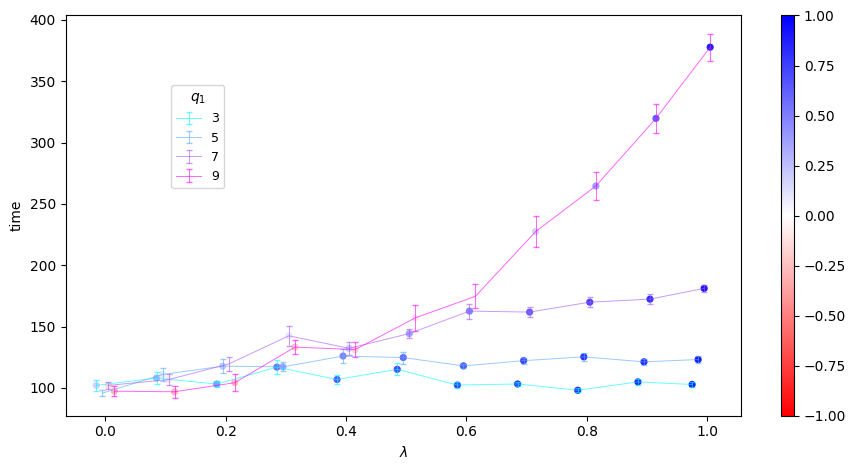

In [7]:
# Stationary times as a function of lambda for many q1s
%matplotlib inline

lambs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
N, pi1, pi2, q2 = 5000, 0.1, 0.1, 10
q1s = [3, 5, 7, 9]

fig, ax = plt.subplots(figsize=(8.8, 4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))

jitterer_qs_l = np.linspace(-0.015,0.015, len(q1s))

for q1,c,jitterer in zip(q1s,colors,jitterer_qs_l):
    times_l, times_l_sigma, Qs_l = [], [], []
    for l in lambs:
        # get the dataframes with the time evolutions:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        # print(len(dfs))
        times, Qs = [], []
        for df in dfs:
            # time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
            time = search_time(w=75, t=0.0005, evo=df['f2'])
            times.append(time)
            # check value of consensus:
            df['Q'] = df['f2'] - 2*df['f1']
            Q = np.average(df['Q'].iloc[time:])
            Qs.append(Q)
        times_l.append(np.average(times)), times_l_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_l.append(np.average(Qs))

    # Consenus markers:
    Q_markers = ['*' if Q>0 else '.' for Q in Qs_l]
    times_Q_pos = [time for time,Q in zip(times_l,Qs_l) if Q>0]
    ls_pos = [l+jitterer for l,Q in zip(lambs, Qs_l) if Q>0]
    times_Q_neg = [time for time,Q in zip(times_l,Qs_l) if Q<0]
    ls_neg = [l+jitterer for l,Q in zip(lambs, Qs_l) if Q<0]
    ax.errorbar(lambs + jitterer, times_l, times_l_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None, color=c, label=f'{q1}', alpha=0.6)
    # ax.scatter(ls_pos, times_Q_pos, marker='*', color=c)
    # ax.scatter(ls_neg, times_Q_neg, marker='.', color=c)
    points = ax.scatter(lambs+jitterer, times_l, c=Qs_l, cmap='bwr_r', vmin=-1, vmax=1, marker='.', s=70)
    
cb = fig.colorbar(points, aspect=30, fraction=0.10)


ax.set(xlabel='$\lambda$', ylabel='time')
# ax.set_xticks(minor=True)
fig.legend(title='$q_1$', fontsize=9, loc=(0.2, 0.6))
fig.tight_layout() # pad=0.02
fig.savefig(f'stat_times_lambda_many_q1_pi1_{pi1}_pi2_{pi2}_q2_{q2}_N_{N}.png')

### comparison of times, fix pis, lambda, q2; varying q1

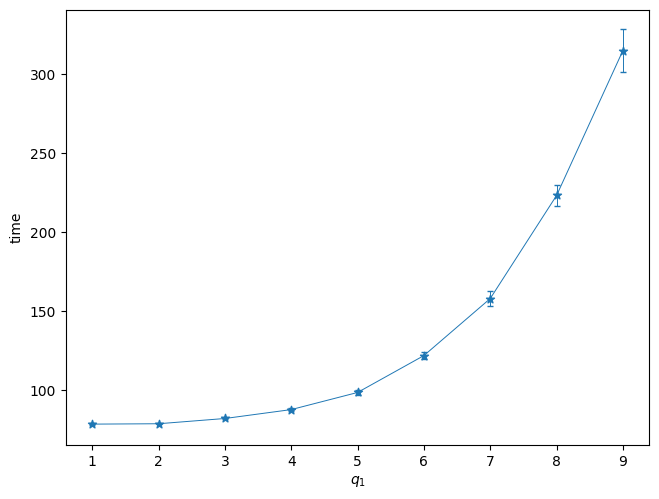

In [11]:
N, pi1, pi2, q2, l = 5000, 0.1, 0.1, 10, 0.9

q1s = [1,2,3,4,5,6,7,8,9]
times_q1, times_q1_sigma, Qs_q1 = [], [], []
for q1 in q1s:
    # get the dataframes with the time evolutions:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    times, Qs = [], []
    for df in dfs:
        time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
        times.append(time)
        # check value of consensus:
        df['Q'] = df['f2'] - 2*df['f1']
        Q = np.average(df['Q'].iloc[time:])
        Qs.append(Q)
    times_q1.append(np.average(times)), times_q1_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_q1.append(np.average(Qs))

# Consenus markers:
Q_markers = ['*' if Q>0 else '.' for Q in Qs_q1]
times_Q_pos = [time for time,Q in zip(times_q1,Qs_q1) if Q>0]
q1s_pos = [q1 for q1,Q in zip(q1s, Qs_q1) if Q>0]
times_Q_neg = [time for time,Q in zip(times_q1,Qs_q1) if Q<0]
q1s_neg = [q1 for q1,Q in zip(q1s, Qs_q1) if Q<0]

fig, ax = plt.subplots()
ax.errorbar(q1s, times_q1, times_q1_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None)
ax.scatter(q1s_pos, times_Q_pos, marker='*')
ax.scatter(q1s_neg, times_Q_neg, marker='.')
ax.set(xlabel='$q_1$', ylabel='time')
fig.tight_layout(pad=0.02)

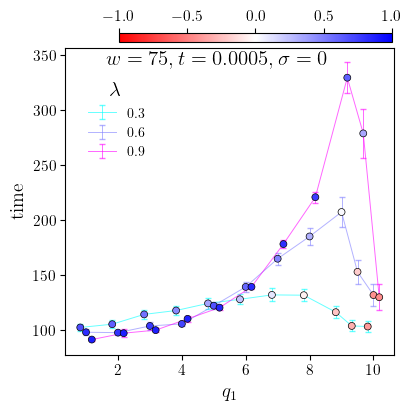

In [9]:
# varying q1 for a set of lambdas:

N, pi1, pi2, q2 = 5000, 0.1, 0.1, 10.0
q1s = [1,2,3,4,5,6,7,8,9,9.5,10.0]

# block size, threshold and gaussian filter:
w, t, sig = 75, 5e-4, 0


lambs = [0.3,0.6,0.9]
colors = plt.cm.cool(np.linspace(0,1,len(lambs)))
jitterer_ls_q1 = np.linspace(-0.18,0.18, len(lambs))


# fig, ax = plt.subplots(constrained_layout=True)

# paper figure:
latexFont(ticklabelssize=11,labelsize=14)
fig, ax = plt.subplots(figsize=(4.0, 4.0), constrained_layout=True)

for l,c,jitterer in zip(lambs,colors,jitterer_ls_q1):
    times_q1, times_q1_sigma, Qs_q1 = [], [], []
    for q1 in q1s:
        # get the dataframes with the time evolutions:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
        folder_qint = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{int(q1)}_q2_{int(q2)}_l_{l}'
        if not os.path.exists(f'{getTimeEvosPath()}/{folder}') and not os.path.exists(f'{getTimeEvosPath()}/{folder_qint}'):
            # call(f'python evo_to_stationary.py {pi} {pi} {q1} {q2} {l} {N} N {np.random.randint(1,1000000)}', shell=True)
            simEvo(pi1, pi2, q1, q2, l, N, ic='N', bots_per_site = [N, 0, 0], max_time = 1000, Nrea=25)
        try:
            files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        except FileNotFoundError:
            files = glob.glob(f'{getTimeEvosPath()}/{folder_qint}/*')
        dfs = [pd.read_csv(file) for file in files]
        times, Qs = [], []
        for df in dfs:
            # time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
            time = search_time(w=w, t=t, evo=df['f2'], sig=sig)
            times.append(time)
            # check value of consensus:
            df['Q'] = df['f2'] - 2*df['f1']
            Q = np.average(df['Q'].iloc[time:])
            Qs.append(Q)
        times_q1.append(np.average(times)), times_q1_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_q1.append(np.average(Qs))
    # Consenus markers:
    Q_markers = ['*' if Q>0 else '.' for Q in Qs_q1]
    times_Q_pos = [time for time,Q in zip(times_q1,Qs_q1) if Q>0]
    q1s_pos = [q1 for q1,Q in zip(q1s, Qs_q1) if Q>0]
    times_Q_neg = [time for time,Q in zip(times_q1,Qs_q1) if Q<0]
    q1s_neg = [q1 for q1,Q in zip(q1s, Qs_q1) if Q<0]
    ax.errorbar(q1s+jitterer, times_q1, times_q1_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None, color=c, alpha=0.6, label=f'{l}', zorder=-1)
    # ax.scatter(q1s_pos, times_Q_pos, marker='*')
    # ax.scatter(q1s_neg, times_Q_neg, marker='.')
    points = ax.scatter(q1s+jitterer, times_q1, c=Qs_q1, cmap='bwr_r', vmin=-1, vmax=1, marker='.', s=100, linewidths=0.5, edgecolors='k')

# fig.colorbar(im, ax=ax[3], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
cb = fig.colorbar(points, location='top', aspect=30, fraction=0.05, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

fig.text(0.25, 0.85, f'$w = {w}, t = {t}, \sigma = {sig}$')
ax.set(xlabel='$q_1$', ylabel='time')
fig.legend(title='$\lambda$', fontsize=10, loc=(0.2, 0.6), frameon=False)
# fig.tight_layout(pad=0.02)
fig.savefig(f'stat_times_q1_many_l_pi1_{pi1}_pi2_{pi2}_q2_{q2}_N_{N}_blockSize_{w}_thresh_{t}.png', dpi = 300)

### comparison of times fix qs, l; varying pis

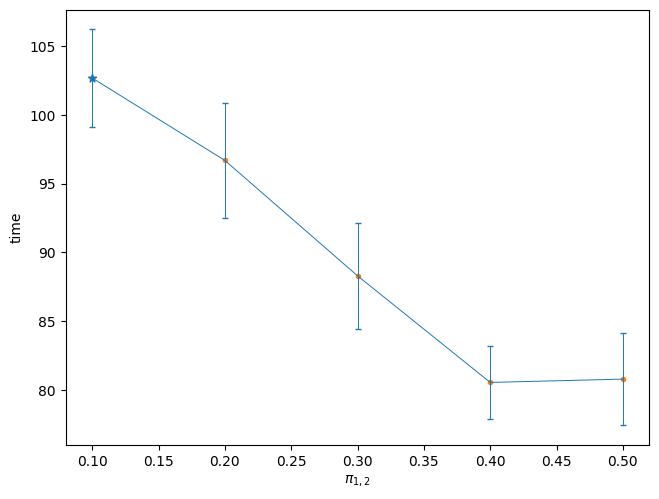

In [29]:
N, q1, q2, l = 5000, 7, 10, 0.3

pis = [0.1, 0.2, 0.3, 0.4, 0.5]
times_pis, times_pis_sigma, Qs_pis = [], [], []
for pi in pis:
    # get the dataframes with the time evolutions:
    folder = f'time_evo_csv_N_{N}_pi1_{pi}_pi2_{pi}_q1_{q1}_q2_{q2}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    times, Qs = [], []
    for df in dfs:
        time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
        times.append(time)
        # check value of consensus:
        df['Q'] = df['f2'] - 2*df['f1']
        Q = np.average(df['Q'].iloc[time:])
        Qs.append(Q)
    times_pis.append(np.average(times)), times_pis_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_pis.append(np.average(Qs))

# Consenus markers:
Q_markers = ['*' if Q>0 else '.' for Q in Qs_pis]
times_Q_pos = [time for time,Q in zip(times_pis,Qs_pis) if Q>0]
pis_pos = [pi for pi,Q in zip(pis, Qs_pis) if Q>0]
times_Q_neg = [time for time,Q in zip(times_pis,Qs_pis) if Q<0]
pis_neg = [pi for pi,Q in zip(pis, Qs_pis) if Q<0]

fig, ax = plt.subplots()
ax.errorbar(pis, times_pis, times_pis_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None)
ax.scatter(pis_pos, times_Q_pos, marker='*')
ax.scatter(pis_neg, times_Q_neg, marker='.')
ax.set(xlabel='$\pi_{1,2}$', ylabel='time')
fig.tight_layout(pad=0.02)

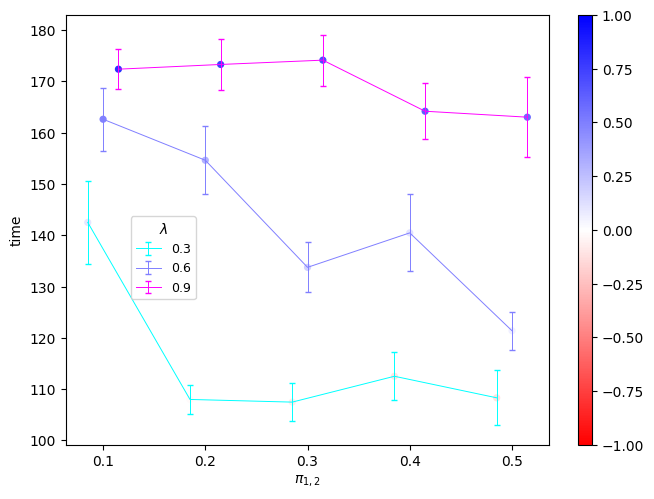

In [11]:
# varying pi1,2 for a set of lambdas:

N, q1, q2 = 5000, 7, 10
lambs = [0.3,0.6,0.9]
colors = plt.cm.cool(np.linspace(0,1,len(lambs)))
jitterer_ls_pis = np.linspace(-0.015,0.015, len(lambs))
fig, ax = plt.subplots()

pis = [0.1, 0.2, 0.3, 0.4, 0.5]
for l,c,jitterer in zip(lambs,colors,jitterer_ls_pis):
    times_pis, times_pis_sigma, Qs_pis = [], [], []
    for pi in pis:
        # get the dataframes with the time evolutions:
        folder = f'time_evo_csv_N_{N}_pi1_{pi}_pi2_{pi}_q1_{q1}_q2_{q2}_l_{l}'
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        times, Qs = [], []
        for df in dfs:
            # time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
            time = search_time(w=75, t=0.0005, evo=df['f2'])
            times.append(time)
            # check value of consensus:
            df['Q'] = df['f2'] - 2*df['f1']
            Q = np.average(df['Q'].iloc[time:])
            Qs.append(Q)
        times_pis.append(np.average(times)), times_pis_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_pis.append(np.average(Qs))
    # Consenus markers:
    Q_markers = ['*' if Q>0 else '.' for Q in Qs_pis]
    times_Q_pos = [time for time,Q in zip(times_pis,Qs_pis) if Q>0]
    pis_pos = [pi for pi,Q in zip(pis, Qs_pis) if Q>0]
    times_Q_neg = [time for time,Q in zip(times_pis,Qs_pis) if Q<0]
    pis_neg = [pi for pi,Q in zip(pis, Qs_pis) if Q<0]
    ax.errorbar(pis+jitterer, times_pis, times_pis_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None, color=c, label=f'{l}')
    # ax.scatter(pis_pos, times_Q_pos, marker='*')
    # ax.scatter(pis_neg, times_Q_neg, marker='.')
    points = ax.scatter(pis+jitterer, times_pis, c=Qs_pis, cmap='bwr_r', vmin=-1, vmax=1, marker='.', s=70)
    
cb = fig.colorbar(points, aspect=30, fraction=0.10)
fig.legend(title='$\lambda$', fontsize=9, loc=(0.2, 0.4))
ax.set(xlabel='$\pi_{1,2}$', ylabel='time')
fig.tight_layout(pad=0.02)
fig.savefig(f'stat_times_pi12_many_l_q1_{q1}_q2_{q2}_N_{N}.png')

### in the asymmetric pi scenario...

time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_1_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_2_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_3_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_4_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_5_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_6_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_8_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_9_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_1_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_2_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_3_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_4_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_5_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_6_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_8_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_9_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_1_q2_10_l_0.9
time_evo_csv_N_5000_pi1_0.25_pi2_0.05_q1_2_q2_10_l_0.9
time_evo_c

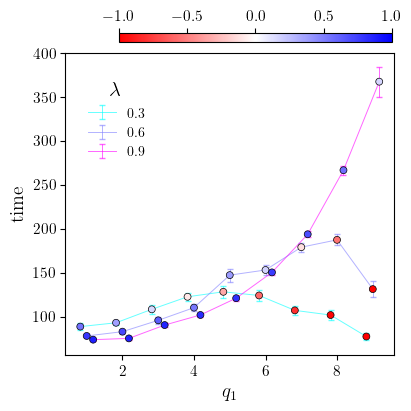

In [9]:
from evo_to_stationary import intEvo, simEvo
# varying q1 for a set of lambdas:

# pi2 < pi1
# N, pi1, pi2, q2 = 5000, 0.25, 0.1, 10
# pi2 > pi1
N, pi1, pi2, q2 = 5000, 0.25, 0.05, 10
q1s = [1,2,3,4,5,6,7,8,9]

# block size, threshold and gaussian filter:
w, t, sig = 50, 5e-4, 0


lambs = [0.3,0.6,0.9]
colors = plt.cm.cool(np.linspace(0,1,len(lambs)))
jitterer_ls_q1 = np.linspace(-0.18,0.18, len(lambs))


# fig, ax = plt.subplots(constrained_layout=True)

latexFont(ticklabelssize=11,labelsize=14)
fig, ax = plt.subplots(figsize=(4.0, 4.0), constrained_layout=True)

for l,c,jitterer in zip(lambs,colors,jitterer_ls_q1):
    times_q1, times_q1_sigma, Qs_q1 = [], [], []
    for q1 in q1s:
        # get the dataframes with the time evolutions:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
        if not os.path.exists(f'{getTimeEvosPath()}/{folder}'):
            simEvo(pi1, pi2, q1, q2, l, N, ic='N', bots_per_site = [N, 0, 0], max_time = 1000, Nrea=25, lround=1)
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        times, Qs = [], []
        for df in dfs:
            # time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
            time = search_time(w=w, t=t, evo=df['f2'], sig=sig)
            times.append(time)
            # check value of consensus:
            df['Q'] = df['f2'] - 2*df['f1']
            Q = np.average(df['Q'].iloc[time:])
            Qs.append(Q)
        times_q1.append(np.average(times)), times_q1_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_q1.append(np.average(Qs))
    # Consenus markers:
    Q_markers = ['*' if Q>0 else '.' for Q in Qs_q1]
    times_Q_pos = [time for time,Q in zip(times_q1,Qs_q1) if Q>0]
    q1s_pos = [q1 for q1,Q in zip(q1s, Qs_q1) if Q>0]
    times_Q_neg = [time for time,Q in zip(times_q1,Qs_q1) if Q<0]
    q1s_neg = [q1 for q1,Q in zip(q1s, Qs_q1) if Q<0]
    ax.errorbar(q1s+jitterer, times_q1, times_q1_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None, color=c, alpha=0.6, label=f'{l}', zorder=-1)
    # ax.scatter(q1s_pos, times_Q_pos, marker='*')
    # ax.scatter(q1s_neg, times_Q_neg, marker='.')
    points = ax.scatter(q1s+jitterer, times_q1, c=Qs_q1, cmap='bwr_r', vmin=-1, vmax=1, marker='.', s=100, linewidths=0.5, edgecolors='k')

# fig.colorbar(im, ax=ax[3], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
cb = fig.colorbar(points, location='top', aspect=30, fraction=0.05, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

# fig.text(0.25, 0.85, f'$w = {w}, t = {t}, \sigma = {sig}$')
ax.set(xlabel='$q_1$', ylabel='time')
fig.legend(title='$\lambda$', fontsize=10, loc=(0.2, 0.6), frameon=False)
# fig.tight_layout(pad=0.02)
fig.savefig(f'stat_times_q1_many_l_pi1_{pi1}_pi2_{pi2}_q2_{q2}_N_{N}_blockSize_{w}_thresh_{t}.png')

time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.3
time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.4
time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.5
time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.6
time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.7
time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.8
time_evo_csv_N_5000_pi1_0.6_pi2_0.01_q1_7_q2_10_l_0.9


NameError: name 'Qs_q1' is not defined

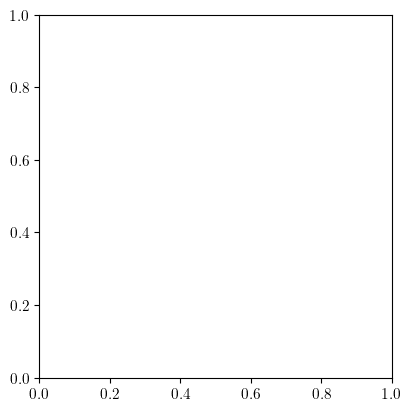

In [7]:
from evo_to_stationary import intEvo, simEvo
# varying q1 for a set of lambdas:

N, pi2, q2 = 5000, 0.01, 10
ls = np.arange(0.0, 1.0, 0.1)
ls = np.around(ls,1)

# block size, threshold and gaussian filter:
w, t, sig = 50, 5e-4, 0

q1_pi1_pairs = [(7, 0.6)]

colors = plt.cm.cool(np.linspace(0,1,len(q1_pi1_pairs)))
jitterer_pairs = np.linspace(-0.18,0.18, len(q1_pi1_pairs))


latexFont(ticklabelssize=11,labelsize=14)
fig, ax = plt.subplots(figsize=(4.0, 4.0), constrained_layout=True)

for pair,c,jitterer in zip(q1_pi1_pairs,colors,jitterer_pairs):
    q1, pi1 = pair
    times_pair, times_pair_sigma, Qs_pair = [], [], []
    for l in ls:
        # get the dataframes with the time evolutions:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
        if not os.path.exists(f'{getTimeEvosPath()}/{folder}'):
            simEvo(pi1, pi2, q1, q2, l, N, ic='N', bots_per_site = [N, 0, 0], max_time = 1000, Nrea=25, lround = len(str(l).split('.')[1]))
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        times, Qs = [], []
        for df in dfs:
            # time = search_time(w=10, t=0.0005, evo=df['f2'], sig=20)
            time = search_time(w=w, t=t, evo=df['f2'], sig=sig)
            times.append(time)
            # check value of consensus:
            df['Q'] = df['f2'] - 2*df['f1']
            Q = np.average(df['Q'].iloc[time:])
            Qs.append(Q)
        times_pair.append(np.average(times)), times_pair_sigma.append(np.std(times)/np.sqrt(len(dfs))), Qs_pair.append(np.average(Qs))
    ax.errorbar(q1s+jitterer, times_pair, times_pair_sigma, capsize=2.0, elinewidth=0.7, lw=0.7, marker=None, color=c, alpha=0.6, label=f'$({q1}, {pi1})$', zorder=-1)
    # ax.scatter(q1s_pos, times_Q_pos, marker='*')
    # ax.scatter(q1s_neg, times_Q_neg, marker='.')
    points = ax.scatter(q1s+jitterer, times_pair, c=Qs_pair, cmap='RdBu', vmin=-1, vmax=1, marker='.', s=100, linewidths=0.5, edgecolors='k')

# fig.colorbar(im, ax=ax[3], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
cb = fig.colorbar(points, location='top', aspect=30, fraction=0.05, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

# fig.text(0.25, 0.85, f'$w = {w}, t = {t}, \sigma = {sig}$')
ax.set(xlabel='$\lambda$', ylabel=r'$t_{ss}$')
fig.legend(title='$(q_1, \pi_1)$', fontsize=10, loc=(0.2, 0.6), frameon=False)

In [5]:
len(str(l).split('.')[1])

17

In [6]:
l

0.30000000000000004

### Visualization of heatmaps for the stationary time

In [3]:
from scipy.ndimage import gaussian_filter

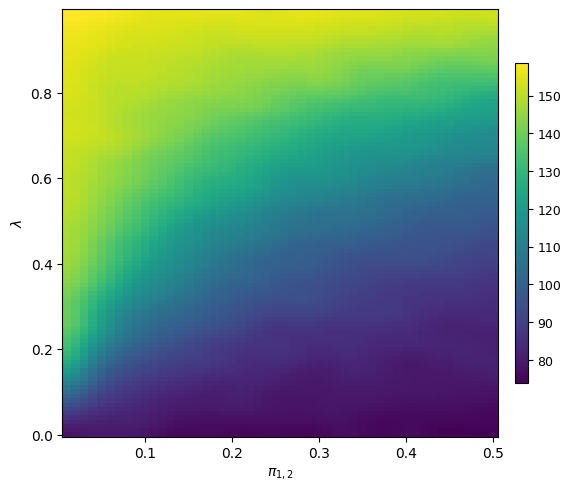

In [24]:
q1, q2, = 7, 10
map = np.load(f'{getTimeEvosPath()}/stat_times_maps/map_times_sim_sym_q1_{q1}_q2_{q2}.npz')
sigma = 2
map_filtered = gaussian_filter(map['time'], sigma=sigma)
fig, ax = plt.subplots(figsize=(5.6,4.8), constrained_layout=True)
im = ax.pcolormesh(map['x'], map['y'], map_filtered, cmap='viridis', shading='nearest')
ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)
# fig.savefig(f'map_times_sim_sym_q1_{q1}_q2_{q2}.png')
# fig.savefig(f'map_times_sim_sym_q1_{q1}_q2_{q2}_gaussian_filtered_sigma_{sigma}.png')

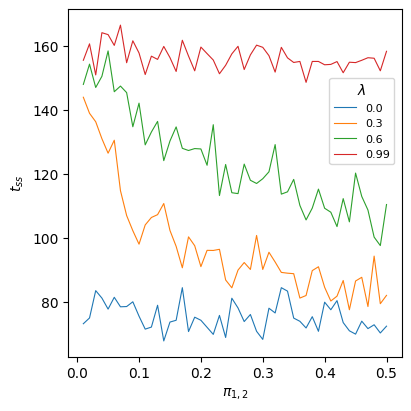

In [56]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ls = [0.0, 0.3, 0.6, 0.99]
pis = map['x'][:,0]
for l in ls:
    lindex = int(l*100)
    times = map['time'][:,lindex]
    ax.plot(pis, times, lw=0.8, label=f'{l}')
ax.set(xlabel='$\pi_{1,2}$', ylabel=r'$t_{ss}$')
fig.legend(title='$\lambda$', fontsize=8, loc=(0.8,0.6))
fig.savefig(f'times_sim_sym_q1_{q1}_q2_{q2}_fixl_varpi_from_map.png')

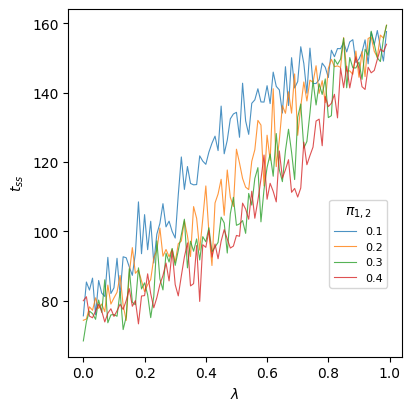

In [55]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
pis = [0.1, 0.2, 0.3, 0.4]
ls = map['y'][0]
for pi in pis:
    piindex = int(pi*100)-1
    times = map['time'][piindex,:]
    ax.plot(ls, times, lw=0.8, alpha=0.8, label=f'{pi}')
ax.set(xlabel='$\lambda$', ylabel=r'$t_{ss}$')
fig.legend(title='$\pi_{1,2}$', fontsize=8, loc=(0.8,0.3))
fig.savefig(f'times_sim_sym_q1_{q1}_q2_{q2}_fixpi_varl_from_map.png')

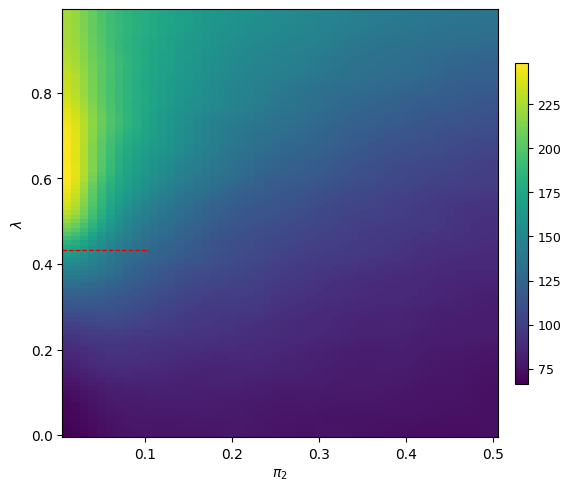

In [7]:
pi1, q1, q2 = 0.25, 7, 10
r1, r2 = 1/q1, 1/q2
lcs = r2*(pi1+r1-r2)/(pi1*r2 + r1 - r2)
map = np.load(f'{getTimeEvosPath()}/stat_times_maps/map_times_sim_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
sigma = 2
map_filtered = gaussian_filter(map['time'], sigma=sigma)
fig, ax = plt.subplots(figsize=(5.6,4.8), constrained_layout=True)
# im = ax.pcolormesh(map['x'], map['y'], map['time'], cmap='viridis', shading='nearest')
im = ax.pcolormesh(map['x'], map['y'], map_filtered, cmap='viridis', shading='nearest')
ax.set_xlabel('$\pi_{2}$')
ax.set_ylabel('$\lambda$')
ax.axhline(lcs, 0.0, 0.2, color='xkcd:red', ls='--', lw=0.9)
# ax.set_xlim(0.005,0.105)
# ax.set_ylim(-0.005,0.105)
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)
# fig.savefig(f'map_times_sim_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.png')
fig.savefig(f'map_times_sim_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}_gaussian_filtered_sigma_{sigma}.png')

### Code to visualize some evos:

In [ ]:
pi1, pi2, q1, q2, l, N, ic = 0.25, 0.01, 7.0, 10.0, 0.02, 5000, 'N'
if ic and ic != 'N':
    print('here')
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}_Euler.csv')
else:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_Euler.csv')
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
# df_avg = get_avg_traj(dfs)
Nplots = 6
start = 0
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8), constrained_layout=True)
for i,df in enumerate(dfs[start:start+Nplots]):
    # simulation:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    # integration:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f0'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f1'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f2'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:blue')
    # details:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xlim(0,None)
    if l > 1/q2:
        ax[int(i//(Nplots/2)),int(i%(Nplots/2))].axhline(1-(1/q2)/l, lw=0.6, ls=':', color='xkcd:blue')
        ax[int(i//(Nplots/2)),int(i%(Nplots/2))].axhline((1/q2)/l, lw=0.6, ls=':', color='xkcd:red')

fig.text(0.1, 0.82, f'$\lambda = {l}$', fontsize=12)

### Fixing wrong times part 1

In [26]:
from time_study_maps import search_time
pi1, pi2, q1, q2, N, ic = 0.25, 0.01, 7.0, 10.0, 5000, 'N'
ls = [0.0, 0.01, 0.02]
for l in ls:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    times = []
    for df in dfs:
        time = search_time(w=50, t=5e-4, evo=df['f2'], sig=0)
        times.append(time)
    print(f'l = {l}, time = {np.average(times)}, sd time = {np.std(times)}')


l = 0.0, time = 59.6, sd time = 8.260750571225353
l = 0.01, time = 61.8, sd time = 7.964923100695952
l = 0.02, time = 62.84, sd time = 8.825780418750515


### Fixing wrong times part 2

In [28]:
q1, q2, pi1 = 7, 10, 0.25
mesh = np.load(f'{getTimeEvosPath()}/stat_times_maps/map_times_sim_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
meshMOD = dict(mesh)

In [40]:
meshMOD['time'][0,0] = 59.6
# meshMOD['time_sd'][0,0] = 8.260750571225353
meshMOD['counts'][0,0] = 25

meshMOD['time'][0,1] = 61.8
# meshMOD['time_sd'][0,1] = 7.964923100695952
meshMOD['counts'][0,1] = 25

meshMOD['time'][0,2] = 62.84
# meshMOD['time_sd'][0,2] = 8.825780418750515
meshMOD['counts'][0,2] = 25

np.savez(f'{getTimeEvosPath()}/stat_times_maps/map_times_sim_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz', x=meshMOD['x'], y=meshMOD['y'],
         time=meshMOD['time'], time_sd=meshMOD['time_sd'], counts=meshMOD['counts'])

## Block average f2 to get convergence time

In [ ]:
w = 10*2 # block size
block_avgs = [np.average(df['f2'].iloc[i:i+w]) for i in range(0, len(df), w)]

fig, ax = plt.subplots()
times = [w*i+w/2 for i in range(len(block_avgs))]
ax.plot(times, block_avgs)

# average difference tolerance
t = 0.001
for i, bavg, bavg2 in zip(range(len(block_avgs[:-1])), block_avgs[:-1], block_avgs[1:]):
    if abs(bavg - bavg2) < t:
        print(f'Stationary time between blocks {i} and {i+1}.')
        print(f'This is, between times {i*w} and {(i+1)*w+w}')
        break

# compute the differences between blocks:
block_avgs_diff = [abs(bavg - bavg2) for bavg,bavg2 in zip(block_avgs[:-1], block_avgs[1:])]